# Lab 4 - Vectors and matrices

Python/SymPy can make our lives easier when working with vectors and matrices. Today we'll learn some basics. For more information see https://docs.sympy.org/latest/modules/matrices/matrices.html#linear-algebra.

In [1]:
from sympy import * #import all (*) of the sympy library

## Vectors

A row vector is a matrix with a single row

In [5]:
var('v1,v2,v3') #define symbols
v = Matrix([[v1,v2,v3]])
v

Matrix([[v1, v2, v3]])

A column vector is a matrix with a single column

In [12]:
v = Matrix([[v1], 
            [v2],
            [v3]]) 
v

Matrix([
[v1],
[v2],
[v3]])

We can switch between row and column vectors by transposing

In [13]:
display(v)
v.transpose()

Matrix([
[v1],
[v2],
[v3]])

Matrix([[v1, v2, v3]])

## Matrices

A matrix is created similarly

In [36]:
var('m11,m12,m13,m21,m22,m23,m31,m32,m33') #define symbols that we'll use as matrix elements
M = Matrix([[m11,m12,m13], #convert list of lists (where inner lists are rows) into SymPy Matrix 
            [m21,m22,m23],
            [m31,m32,m33]])
M #print matrix to see result

Matrix([
[m11, m12, m13],
[m21, m22, m23],
[m31, m32, m33]])

And can be transposed

In [37]:
M.transpose()

Matrix([
[m11, m21, m31],
[m12, m22, m32],
[m13, m23, m33]])

There are also methods to quickly make some special matrices, eg, 

In [40]:
n = 2
eye(n) #identity matrix of dimension nxn

Matrix([
[1, 0],
[0, 1]])

In [44]:
diag(3,2,1) #diagonal matrix, provide the diagonal entries 

Matrix([
[3, 0, 0],
[0, 2, 0],
[0, 0, 1]])

## Addition

We can add (or subtract) together vectors (and matrices) of the same dimension

In [19]:
v - v

Matrix([
[0],
[0],
[0]])

In [21]:
M + M

Matrix([
[2*m11, 2*m12, 2*m13],
[2*m21, 2*m22, 2*m23],
[2*m31, 2*m32, 2*m33]])

### Multiplication

We can multiply by scalars

In [23]:
4.1 * v

Matrix([
[4.1*v1],
[4.1*v2],
[4.1*v3]])

In [25]:
-7 * M

Matrix([
[-7*m11, -7*m12, -7*m13],
[-7*m21, -7*m22, -7*m23],
[-7*m31, -7*m32, -7*m33]])

We can also multiply vectors and matrices with each other when their inner dimensions match (ie, the number of columns of the first object is equal to the number of rows of the second object)

In [27]:
v*v.transpose()

Matrix([
[v1**2, v1*v2, v1*v3],
[v1*v2, v2**2, v2*v3],
[v1*v3, v2*v3, v3**2]])

In [28]:
v.transpose()*v

Matrix([[v1**2 + v2**2 + v3**2]])

In [26]:
M * v

Matrix([
[m11*v1 + m12*v2 + m13*v3],
[m21*v1 + m22*v2 + m23*v3],
[m31*v1 + m32*v2 + m33*v3]])

In [29]:
M * M

Matrix([
[ m11**2 + m12*m21 + m13*m31, m11*m12 + m12*m22 + m13*m32, m11*m13 + m12*m23 + m13*m33],
[m11*m21 + m21*m22 + m23*m31,  m12*m21 + m22**2 + m23*m32, m13*m21 + m22*m23 + m23*m33],
[m11*m31 + m21*m32 + m31*m33, m12*m31 + m22*m32 + m32*m33,  m13*m31 + m23*m32 + m33**2]])

## Plotting vectors

To visualize vectors and how they are transformed by matrix multiplication, let's turn to a numerical example with a 2 dimensional vector and a 2x2 matrix

In [30]:
v = Matrix([[1], #2 dimensional column vector
            [1]])
M = Matrix([[1,0], #2x2 matrix
            [0,2]]) 
v

Matrix([
[1],
[1]])

We first plot the original vector

In [31]:
import matplotlib.pyplot as plt #import plotting library

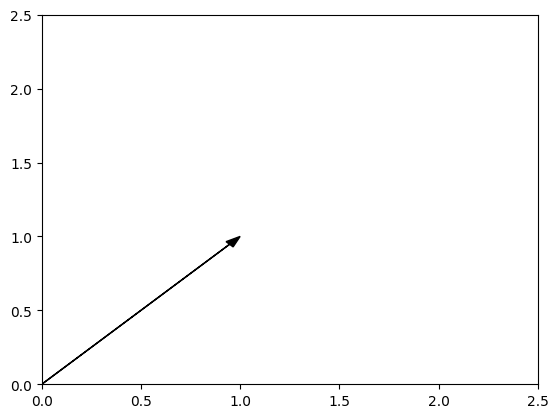

In [46]:
plt.arrow(0, 0, #starting x and y values of arrow
          float(v[0]), float(v[1]), #change in x and y (here need to convert elements of vector to floats)
          head_width=0.05, color='black', length_includes_head=True) #aesthetics
plt.xlim(0,2.5) #set bounds on x axis
plt.ylim(0,2.5) #set bounds on y axis
plt.show()

and now we add the transformed vector we get by multiplying the original vector by the matrix

In [33]:
u = M * v # multiplying by the matrix transforms the original vector v into a new vector u
u

Matrix([
[1],
[2]])

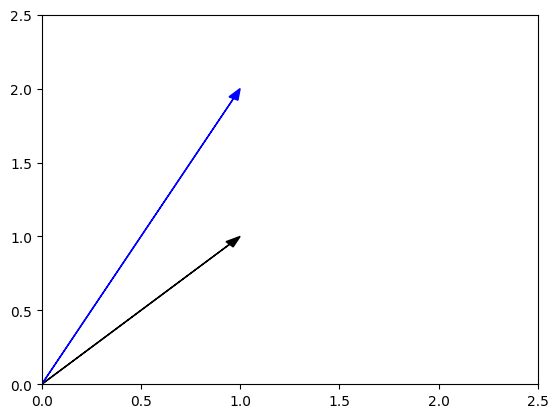

In [54]:
colors = ['black','blue']
i = 0 #color index
for x in [v,u]: #for the old and new vector
    plt.arrow(0, 0, #starting x and y values of arrow
          float(x[0]), float(x[1]), #change in x and y (here need to convert elements of vector to floats)
          head_width=0.05, color=colors[i], length_includes_head=True) #aesthetics
    i = i + 1
plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.show()

## Question

Consider a discrete time version of our 2-island bird model

$$
\vec{n}(t+1) = \mathbf{M} \vec{n}(t) + \vec{m},
$$

where

$$
\begin{align}
\vec{n}(t) = \begin{pmatrix} n_1(t) \\ n_2(t) \end{pmatrix}\\
\mathbf{M} = \begin{pmatrix} R_1 & m_{12} \\ m_{21} & R_2 \end{pmatrix}\\
\vec{m} = \begin{pmatrix} m_1 \\ m_2 \end{pmatrix},
\end{align}
$$

with $n_i(t)$ the number of birds on island $i$ at time $t$, $R_i$ the reproductive factor on island $i$, $m_{ij}$ the proportion of birds on island $j$ that migrate to island $i$, and $m_i$ the number of birds arriving to island $i$ from elsewhere.

Using the initial conditions and parameter values below, iterate the multivariate recursion equation in matrix form, $\vec{n}(t+1) = \mathbf{M} \vec{n}(t) + \vec{m}$, for 10 time steps (a generator would be most efficient). Plot the vectors for all time steps in one plot (coloring by time would be helpful) to see how the number of birds on each of the two islands changes over time.

In [61]:
# initial conditions
n10, n20 = 10, 5

# parameter values
R1, R2 = 0.9, 0.9
m12, m21 = 0.05, 0.05
m1, m2 = 5, 5